In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
# dteday -> datetime 속성으로 바꾸기
train.dteday=pd.to_datetime(train.dteday, infer_datetime_format=True,dayfirst=True)
test.dteday=pd.to_datetime(test.dteday, infer_datetime_format=True,dayfirst=True)

In [4]:
# day 추가
train['day']=train['dteday'].dt.day
test['day']=test['dteday'].dt.day

In [5]:
train

,ID,dteday,season,year,Month,is_holiday,weekdaynum,is_workingday,weathersituation,atemp_normalized,humidity_normalized,windspeed_normalized,total_rental,day
0,A1,2011-01-01,1,0,1,0,6,0,2,0.363625,0.805833,0.160446,985,1
1,A2,2011-01-02,1,0,1,0,0,0,2,0.353739,0.696087,0.248539,801,2
2,A3,2011-01-03,1,0,1,0,1,1,1,0.189405,0.437273,0.248309,1349,3
3,A4,2011-01-04,1,0,1,0,2,1,1,0.212122,0.590435,0.160296,1562,4
4,A5,2011-01-05,1,0,1,0,3,1,1,0.229270,0.436957,0.186900,1600,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,A595,2012-08-17,3,1,8,0,5,1,1,0.242400,0.570833,0.231354,7148,17
595,A596,2012-08-18,3,1,8,0,6,0,1,0.618071,0.603333,0.177867,7865,18
596,A597,2012-08-19,3,1,8,0,0,0,2,0.603554,0.711667,0.086450,4549,19
597,A598,2012-08-20,3,1,8,0,1,1,2,0.595967,0.734167,0.129979,6530,20


In [6]:
train['DateTime']=train['dteday']
test['DateTime']=test['dteday']

In [7]:
if train.index.dtype=='int64':
    train.set_index('DateTime',inplace=True)
train

,ID,dteday,season,year,Month,is_holiday,weekdaynum,is_workingday,weathersituation,atemp_normalized,humidity_normalized,windspeed_normalized,total_rental,day
DateTime,,,,,,,,,,,,,,
2011-01-01,A1,2011-01-01,1,0,1,0,6,0,2,0.363625,0.805833,0.160446,985,1
2011-01-02,A2,2011-01-02,1,0,1,0,0,0,2,0.353739,0.696087,0.248539,801,2
2011-01-03,A3,2011-01-03,1,0,1,0,1,1,1,0.189405,0.437273,0.248309,1349,3
2011-01-04,A4,2011-01-04,1,0,1,0,2,1,1,0.212122,0.590435,0.160296,1562,4
2011-01-05,A5,2011-01-05,1,0,1,0,3,1,1,0.229270,0.436957,0.186900,1600,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-08-17,A595,2012-08-17,3,1,8,0,5,1,1,0.242400,0.570833,0.231354,7148,17
2012-08-18,A596,2012-08-18,3,1,8,0,6,0,1,0.618071,0.603333,0.177867,7865,18
2012-08-19,A597,2012-08-19,3,1,8,0,0,0,2,0.603554,0.711667,0.086450,4549,19


In [8]:
if test.index.dtype=='int64':
    test.set_index('DateTime',inplace=True)
test

,ID,dteday,season,year,Month,is_holiday,weekdaynum,is_workingday,weathersituation,atemp_normalized,humidity_normalized,windspeed_normalized,day
DateTime,,,,,,,,,,,,,
2012-08-22,A600,2012-08-22,3,1,8,0,3,1,1,0.621854,0.677083,0.070283,22
2012-08-23,A601,2012-08-23,3,1,8,0,4,1,1,0.637008,0.635833,0.084596,23
2012-08-24,A602,2012-08-24,3,1,8,0,5,1,2,0.647100,0.615000,0.072146,24
2012-08-25,A603,2012-08-25,3,1,8,0,6,0,2,0.618696,0.712917,0.244408,25
2012-08-26,A604,2012-08-26,3,1,8,0,0,0,2,0.595996,0.845833,0.228858,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-26,A726,2012-12-26,1,1,12,0,3,1,3,0.220333,0.823333,0.316546,26
2012-12-27,A727,2012-12-27,1,1,12,0,4,1,2,0.226642,0.652917,0.350133,27
2012-12-28,A728,2012-12-28,1,1,12,0,5,1,2,0.255046,0.590000,0.155471,28


## train에 resid 추가하기

In [9]:
decompose = sm.tsa.seasonal_decompose(train['total_rental'], model='additive')
resid = pd.DataFrame(decompose.resid)
resid.columns = ['resid_total']
resid.fillna(method='ffill', inplace=True)
resid.fillna(method='bfill', inplace=True)
train = pd.concat([train,resid],axis=1)
train

,ID,dteday,season,year,Month,is_holiday,weekdaynum,is_workingday,weathersituation,atemp_normalized,humidity_normalized,windspeed_normalized,total_rental,day,resid_total
DateTime,,,,,,,,,,,,,,,
2011-01-01,A1,2011-01-01,1,0,1,0,6,0,2,0.363625,0.805833,0.160446,985,1,147.552132
2011-01-02,A2,2011-01-02,1,0,1,0,0,0,2,0.353739,0.696087,0.248539,801,2,147.552132
2011-01-03,A3,2011-01-03,1,0,1,0,1,1,1,0.189405,0.437273,0.248309,1349,3,147.552132
2011-01-04,A4,2011-01-04,1,0,1,0,2,1,1,0.212122,0.590435,0.160296,1562,4,147.552132
2011-01-05,A5,2011-01-05,1,0,1,0,3,1,1,0.229270,0.436957,0.186900,1600,5,314.347090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-08-17,A595,2012-08-17,3,1,8,0,5,1,1,0.242400,0.570833,0.231354,7148,17,209.194149
2012-08-18,A596,2012-08-18,3,1,8,0,6,0,1,0.618071,0.603333,0.177867,7865,18,968.594149
2012-08-19,A597,2012-08-19,3,1,8,0,0,0,2,0.603554,0.711667,0.086450,4549,19,968.594149


In [10]:
tr = train.reset_index()
y = train['resid_total']

In [11]:
tr = tr.drop(['DateTime','ID','dteday','Month','day','resid_total','total_rental'],axis=1)

In [12]:
tr

,season,year,is_holiday,weekdaynum,is_workingday,weathersituation,atemp_normalized,humidity_normalized,windspeed_normalized
0,1,0,0,6,0,2,0.363625,0.805833,0.160446
1,1,0,0,0,0,2,0.353739,0.696087,0.248539
2,1,0,0,1,1,1,0.189405,0.437273,0.248309
3,1,0,0,2,1,1,0.212122,0.590435,0.160296
4,1,0,0,3,1,1,0.229270,0.436957,0.186900
...,...,...,...,...,...,...,...,...,...
594,3,1,0,5,1,1,0.242400,0.570833,0.231354
595,3,1,0,6,0,1,0.618071,0.603333,0.177867
596,3,1,0,0,0,2,0.603554,0.711667,0.086450
597,3,1,0,1,1,2,0.595967,0.734167,0.129979


In [13]:
te = test.reset_index()
te = te.drop(['DateTime','ID','dteday','Month','day'],axis=1)

In [14]:
te

,season,year,is_holiday,weekdaynum,is_workingday,weathersituation,atemp_normalized,humidity_normalized,windspeed_normalized
0,3,1,0,3,1,1,0.621854,0.677083,0.070283
1,3,1,0,4,1,1,0.637008,0.635833,0.084596
2,3,1,0,5,1,2,0.647100,0.615000,0.072146
3,3,1,0,6,0,2,0.618696,0.712917,0.244408
4,3,1,0,0,0,2,0.595996,0.845833,0.228858
...,...,...,...,...,...,...,...,...,...
126,1,1,0,3,1,3,0.220333,0.823333,0.316546
127,1,1,0,4,1,2,0.226642,0.652917,0.350133
128,1,1,0,5,1,2,0.255046,0.590000,0.155471
129,1,1,0,6,0,2,0.242400,0.752917,0.124383


# resid 예측

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(tr,y,shuffle=True)


## rf

In [16]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor()
model_rf.fit(x_train,y_train)
y_pred_rf =model_rf.predict(x_test)
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test, y_pred_rf, squared=False)
rmse

577.1789040433148

## xgb

In [17]:
from xgboost import XGBRegressor
model_xgb = XGBRegressor()
model_xgb.fit(x_train,y_train)
y_pred_xgb =model_xgb.predict(x_test)
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test, y_pred_xgb, squared=False)
rmse

648.6459179507751

## lr

In [18]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(
    x_train,y_train)
y_pred_lr =model_lr.predict(x_test)
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test, y_pred_lr, squared=False)
rmse

658.3951564969352

## lgbm

In [19]:
from lightgbm import LGBMRegressor
model_lgbm =LGBMRegressor()
model_lgbm.fit(x_train,y_train)
y_pred_lgbm =model_lgbm.predict(x_test)
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test, y_pred_lgbm, squared=False)
rmse

590.9593454721132

## resid 결론

### rf 가 젤 좋게 나왔으니까 rf로 resid를 예측하겠습니당

In [20]:
model_RF = RandomForestRegressor()
model_RF.fit(tr,y)
y_pred_RF=model_RF.predict(te)

In [21]:
len(y_pred_RF)

131

In [22]:
test['resid_total']=y_pred_RF

In [23]:
test

,ID,dteday,season,year,Month,is_holiday,weekdaynum,is_workingday,weathersituation,atemp_normalized,humidity_normalized,windspeed_normalized,day,resid_total
DateTime,,,,,,,,,,,,,,
2012-08-22,A600,2012-08-22,3,1,8,0,3,1,1,0.621854,0.677083,0.070283,22,679.263659
2012-08-23,A601,2012-08-23,3,1,8,0,4,1,1,0.637008,0.635833,0.084596,23,494.848778
2012-08-24,A602,2012-08-24,3,1,8,0,5,1,2,0.647100,0.615000,0.072146,24,818.903684
2012-08-25,A603,2012-08-25,3,1,8,0,6,0,2,0.618696,0.712917,0.244408,25,-449.018157
2012-08-26,A604,2012-08-26,3,1,8,0,0,0,2,0.595996,0.845833,0.228858,26,-1272.680014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-26,A726,2012-12-26,1,1,12,0,3,1,3,0.220333,0.823333,0.316546,26,-1326.503448
2012-12-27,A727,2012-12-27,1,1,12,0,4,1,2,0.226642,0.652917,0.350133,27,-335.647395
2012-12-28,A728,2012-12-28,1,1,12,0,5,1,2,0.255046,0.590000,0.155471,28,-2.914088


##  모델링 전 최종 train,test 형태

In [24]:
train = train.reset_index()
test = test.reset_index()

<AxesSubplot:>

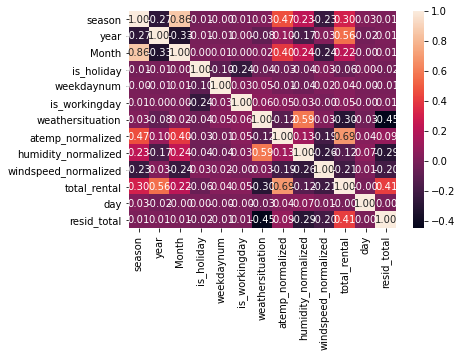

In [25]:
sns.heatmap(train.corr(), annot=True, fmt='.2f')

In [26]:
y_target = train['total_rental']
train = train.drop(['DateTime','Month','ID','dteday','total_rental','day'],axis=1)
test = test.drop(['DateTime','Month','dteday','day'],axis=1)

In [27]:
train

,season,year,is_holiday,weekdaynum,is_workingday,weathersituation,atemp_normalized,humidity_normalized,windspeed_normalized,resid_total
0,1,0,0,6,0,2,0.363625,0.805833,0.160446,147.552132
1,1,0,0,0,0,2,0.353739,0.696087,0.248539,147.552132
2,1,0,0,1,1,1,0.189405,0.437273,0.248309,147.552132
3,1,0,0,2,1,1,0.212122,0.590435,0.160296,147.552132
4,1,0,0,3,1,1,0.229270,0.436957,0.186900,314.347090
...,...,...,...,...,...,...,...,...,...,...
594,3,1,0,5,1,1,0.242400,0.570833,0.231354,209.194149
595,3,1,0,6,0,1,0.618071,0.603333,0.177867,968.594149
596,3,1,0,0,0,2,0.603554,0.711667,0.086450,968.594149
597,3,1,0,1,1,2,0.595967,0.734167,0.129979,968.594149


In [28]:
test

,ID,season,year,is_holiday,weekdaynum,is_workingday,weathersituation,atemp_normalized,humidity_normalized,windspeed_normalized,resid_total
0,A600,3,1,0,3,1,1,0.621854,0.677083,0.070283,679.263659
1,A601,3,1,0,4,1,1,0.637008,0.635833,0.084596,494.848778
2,A602,3,1,0,5,1,2,0.647100,0.615000,0.072146,818.903684
3,A603,3,1,0,6,0,2,0.618696,0.712917,0.244408,-449.018157
4,A604,3,1,0,0,0,2,0.595996,0.845833,0.228858,-1272.680014
...,...,...,...,...,...,...,...,...,...,...,...
126,A726,1,1,0,3,1,3,0.220333,0.823333,0.316546,-1326.503448
127,A727,1,1,0,4,1,2,0.226642,0.652917,0.350133,-335.647395
128,A728,1,1,0,5,1,2,0.255046,0.590000,0.155471,-2.914088
129,A729,1,1,0,6,0,2,0.242400,0.752917,0.124383,-384.793086


In [32]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(
    GradientBoostingRegressor(learning_rate= 0.005, max_depth= 7, n_estimators= 1500, subsample= 0.2)
)

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
params = {
    'n_estimators':(100, 200,300,400),
    'max_depth' : (4 ,5, 6, 7, 8, 9, 10),
    'min_samples_leaf' : (1 ,2, 4, 8, 16),
    'min_samples_split' : (2, 4, 8, 16)
}
rf_run = RandomForestRegressor(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_run, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(train, y_target)
 
 
print('최적 하이퍼 파라미터:', grid_cv.best_params_)
print('최적 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

KeyboardInterrupt: 

In [31]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(learning_rate= 0.005, max_depth= 7, n_estimators= 1500, subsample= 0.2)
gb.fit(train,y_target)

GradientBoostingRegressor(learning_rate=0.005, max_depth=7, n_estimators=1500,
                          subsample=0.2)

In [35]:
RF = RandomForestRegressor(max_depth= 6, min_samples_leaf= 1, min_samples_split= 2, 
                           n_estimators= 100,random_state=0, n_jobs=-1)
RF_model = RF.fit(train,y_target)

In [48]:
from sklearn.svm import SVR, SVC
estimator_svr_rbf = SVR()
estimator_svr_rbf.fit(train, y_target)

SVR()

In [61]:
params = {
    'C':(0, 1, 2,3,4),
    'degree' : (1 ,2, 3, 4, 5,6,7,8,9,10),
    'coef0' : (0,0.1,0.01 )
}
svr = SVR()
grid_cv = GridSearchCV(svr, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(train, y_target)
 
 
print('최적 하이퍼 파라미터:', grid_cv.best_params_)
print('최적 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터: {'C': 1, 'coef0': 0, 'degree': 1}
최적 예측 정확도: -0.6919


In [49]:
estimator_svr_rbf = SVR(C= 1, coef0= 0, degree=1)
estimator_svr_rbf.fit(train, y_target)

SVR(C=1, coef0=0, degree=1)

In [54]:
from sklearn.ensemble import StackingRegressor
stack_models = [('rf',RF),('xgb', model_xgb),('svr',estimator_svr_rbf),('gb',gb)]
stack_reg = StackingRegressor(stack_models, final_estimator=pipe, n_jobs=-1)
stack_reg.fit(train, y_target)

StackingRegressor(estimators=[('xgb',
                               XGBRegressor(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1, gamma=0,
                                            gpu_id=-1, importance_type='gain',
                                            interaction_constraints='',
                                            learning_rate=0.300000012,
                                            max_delta_step=0, max_depth=6,
                                            min_child_weight=1, missing=nan,
                                            monotone_constraints='()',
                                            n_estimators=100, n_jobs=8,
                                            num_...
                              ('svr', SVR(C=1, coef0=0, degree=1)),
                              ('rf',
        

In [55]:
stack=stack_reg.predict(test_x)

In [ ]:
model_xgb = XGBRegressor()

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor

voting_model = VotingRegressor([('xgb', model_xgb), ('gb',gb)])

voting_model.fit(train , y_target)

VotingRegressor(estimators=[('xgb',
                             XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          gpu_id=-1, importance_type='gain',
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_delta_step=0, max_depth=6,
                                          min_child_weight=1, missing=nan,
                                          monotone_constraints='()',
                                          n_estimators=100, n_jobs=6,
                                          num_parallel_tree=1, random_state=0,
                                          reg_alpha=0, reg_lambda=1,
                                         

In [202]:
voting = voting_model.predict(test_x)

In [38]:
features = ['season', 'year', 'is_holiday', 'weekdaynum', 'is_workingday',
       'weathersituation', 'atemp_normalized', 'humidity_normalized',
       'windspeed_normalized','resid_total']

In [39]:
test_x = test[features]

In [79]:
a=RF_model.predict(test_x)

In [41]:
sample=test.drop(['season', 'year','is_holiday', 'weekdaynum', 'is_workingday',
       'weathersituation', 'atemp_normalized', 'humidity_normalized',
       'windspeed_normalized','resid_total'],axis=1)

In [56]:
sample['total_rental']= stack

In [57]:
sample.to_csv('result_ST21.csv', index = False)